# Computer Vision

Robotics:
1. Perception: Sense what is in the world (CV)
    - Detect lane markings, vehicles.
    - Alternative to cameras: radar + lidar (see the world in 3D, more costly, lower spatial resolution compared to cameras)
        - Possible that in future cars are fitted with only a few cameras for perception as opposed to cameras, radars and lidars.
2. Decide what to do based on that perception
3. Perform action to carry out decision



Two pieces:
- Advanced lane lines
- Vehicle (other vehicles) location and tracking

**Action: Steer car** 
- Steer car: Need to measure how much lane is curving. 
- Need to get perspective transformation from front view to birds-eye view.
- Correct for effect of image distortion.
    - changes shape and size of objects.


## Correcting for image distortion

### Types of distortion

![](images/18-1.png)

#### Pinhole camera model

![](images/18-2.png)
Image captured by pinhole camera is upside-down and reversed.

Real cameras don't use pinholes - they use lenses. Lenses introduce distortion. Light rays bend too much or too little at the edges of a lens.

![](images/18-4.png)


**Radial distortion**: Real cameras use curved lenses to form an image, and light rays often bend a little too much or too little at the edges of these lenses. This creates an effect that distorts the edges of images, so that lines or objects appear more or less curved than they actually are. This is called radial distortion, and it’s the most common type of distortion.
- Fisheye lenses use radial distortion for a stylistic effect.

**Tangential distortion**: This occurs when a camera’s lens is not aligned perfectly parallel to the imaging plane, where the camera film or sensor is. This makes an image look tilted so that some objects appear farther away or closer than they actually are.


### Distortion coefficients and correction
Typically five coefficients

![](images/18-3.png)


To undistort points, OpenCV calculates `r`, where 
$$r = ||(x_{corrected}, y_{corrected})-(x_c, y_c)||$$

where $(x_c, y_c)$ is the *distortion center*, the center of the image distortion.




![](images/18-5.png)
*Points in an distorted and undistorted (corrected) image. The point (x, y) is a single point in a distorted image and (x_corrected, y_corrected) is where that point will appear in the undistorted (corrected) image.*

**Radial distortion correction formula**: We can calculate `(x_corrected, y_corrected)` thus:
![](images/18-6.png)
*Radial distortion correction.*

**Tangential distortion correction formula**:
![](images/18-7.png)




#### Calibrating our camera

1. Take pictures of known shapes to calibrate our camera. E.g. a chessboard (a regular, high-contrast pattern).
    * Recommended to use at least 20 images for calibration. Images taken at different angles and distances.
    * Include a test image.

2. Store the object and image points from each image.
    * Object points: 3D points in real world space
        * E.g. for a 7 row by 9 column chessboard:
            * ![](images/18-9.png)
        * Initialise arrays and fill arrays using objpo = np.zeros
            `objp = np.zeros((6*8,3), np.float32)
            objp[:,:2] = np.mgrid(8:8,0:6].T.reshape[-1,2]`
    * Image points: 2D points in image plane
3. Find chessboard corners

2. Create a transform that maps distorted points to undistorted (corrected) points.

### Finding Corners

Use the OpenCV functions [findChessboardCorners()](http://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#cv2.findChessboardCorners) and [drawChessboardCorners()](http://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#cv2.drawChessboardCorners) to automatically find and draw corners in your image.

In [ ]:
# Finding Corners exercise

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import glob
# prepare object points
nx = 8 # Number of inside corners in any given row
ny = 6 # Number of inside corners in any given column

# Read in and make a list of calibration images

# glob allows us to read in files with consistent file names
# e.g. calibration-1.jpg, calibration-2.jpg...
images = glob.glob("calibration_images/calibration*.jpg")

for fname in images:
    img = cv2.imread(fname)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    # Parameters: (image, chessboard dims, param for any flags)
    # chessboard dims = inside corners, not squares.
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # If found, draw corners
    if ret == True:
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        plt.imshow(img)

*Calibration image provided with result for Finding Corners exercise:*
![](images/18-8.jpg)

### CV functions to calibrate our camera

`cv2.calibrateCamera`:
![](images/18-10.png)

* `gray.shape[::-1]`: Shape of the image
* `dist`: distortion coefficient
* `mtx`: Camera matrix
* `rvecs, tvecs`: position of camera in the world.

![](images/18-4.png)
*Camera matrix*

`cv2.undistort(img, mtx, dist, None, mtx)`:

* `img`: image
* `mtx`: Camera matrix
* `dist`: distortion coefficients
* Returns undistorted (destination) image.


### Just copying from 'Calibrating Your Camera'

Examples of Useful Code

Converting an image, imported by cv2 or the glob API, to grayscale:

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
Note: If you are reading in an image using mpimg.imread() this will read in an RGB image and you should convert to grayscale using cv2.COLOR_RGB2GRAY, but if you are using cv2.imread() or the glob API, as happens in this video example, this will read in a BGR image and you should convert to grayscale using cv2.COLOR_BGR2GRAY. We'll learn more about color conversions later on in this lesson, but please keep this in mind as you write your own code and look at code examples.

Finding chessboard corners (for an 8x6 board):

```
ret, corners = cv2.findChessboardCorners(gray, (8,6),None)```
Drawing detected corners on an image:

```
img = cv2.drawChessboardCorners(img, (8,6), corners, ret)```
Camera calibration, given object points, image points, and the shape of the grayscale image:

```
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)```
Undistorting a test image:

```
dst = cv2.undistort(img, mtx, dist, None, mtx)```
A note on image shape
The shape of the image, which is passed into the calibrateCamera function, is just the height and width of the image. One way to retrieve these values is by retrieving them from the grayscale image shape array gray.shape[::-1]. This returns the image height and width in pixel values like (960, 1280).

Another way to retrieve the image shape, is to get them directly from the color image by retrieving the first two values in the color image shape array using img.shape[0:2]. This code snippet asks for just the first two values in the shape array.

It's important to use an entire grayscale image shape or the first two values of a color image shape. This is because the entire shape of a color image will include a third value -- the number of color channels -- in addition to the height and width of the image. For example the shape array of a color image might be (960, 1280, 3), which are the pixel height and width of an image (960, 1280) and a third value (3) that represents the three color channels in the color image which you'll learn more about later, and if you try to pass these three values into the calibrateCamera function, you'll get an error.

In [ ]:
# import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in the saved objpoints and imgpoints
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
objpoints = dist_pickle["objpoints"]
imgpoints = dist_pickle["imgpoints"]

# Read in an image
img = cv2.imread('test_image.png')

# TODO: Write a function that takes an image, object points, and image points
# performs the camera calibration, image distortion correction and 
# returns the undistorted image
def cal_undistort(img, objpoints, imgpoints):
    # Use cv2.calibrateCamera and cv2.undistort()
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[0:2], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

undistorted = cal_undistort(img, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Extracting information from images of the road

## Lane Curvature
Why: Need to be told the correct steering angle to turn

Process:
1. Detect lane lines using masking and thresholding techniques.
    * ![](images/18-11.png)
2. Perform perspective transform to get birds' eye view of the lane.
    * ![](images/18-12.png)

3. Fit polynomial to lane line `f(y) = Ay^2 + By + C`.
4. Extract curvature of lane lines using a mapping.
    * ![](images/18-13.png)

    * A gives you the curvature of the lane line, B gives you the heading or direction that the line is pointing, and C gives you the position of the line based on how far away it is from the very left of an image (y = 0).

### Perspective transform
Changes apparent persective. Maps the points in a given image to different, desired, image points with a new perspective.
![](images/18-16.png)

Examples of perspective:
![](images/18-14.png)
![](images/18-15.png)

Birds eye view also allows us to map a car's location to e.g. Google Maps.

![](images/18-17.png)
![](images/18-18.png)

Use traffic sign because it's easy to see if you've performed a perspective transform (well) when using a flat surface with distinct reference points e.g. text.
Four points are enough to define a linear perspective transform. (Q: Why not three if it's a plane?)

* Source coordinates: Manually find coordinates of points in an interactive window (mouse over points in the image).
    * Often not the best option. There are many other ways to select source points. For example, many perspective transform algorithms will programmatically detect four source points in an image based on edge or corner detection and analyzing attributes like color and surrounding pixels.
* Desired coordinates: chosen by eyeballing a rectangle


`M = cv2.getPerspectiveTransform(src, dst)`
* Returns mapping as a perspective matrix

`warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)`
* img: image to transform
* M: Perspective matrix
* img_size: size we want the warped image to be
* flags: how to interpolate points, i.e. filling in points as it warps an image.
* Returns warped image


![](images/18-20.png)
![](images/18-21.png)

### Copied from 'Transform a Stop Sign'

Examples of Useful Code

Compute the perspective transform, M, given source and destination points:

M = cv2.getPerspectiveTransform(src, dst)
Compute the inverse perspective transform:

Minv = cv2.getPerspectiveTransform(dst, src)
Warp an image using the perspective transform, M:

warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
Note: When you apply a perspective transform, choosing four source points manually, as we did in this video, is often not the best option. There are many other ways to select source points. For example, many perspective transform algorithms will programmatically detect four source points in an image based on edge or corner detection and analyzing attributes like color and surrounding pixels.

In [1]:
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    undistort = cv2.undistort(img, mtx, dist, None, mtx)
    # 2) Convert to grayscale
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    # 4) If corners found: 
    print("Corners: ", corners)
    if corners.any() == True:
            # a) draw corners
            cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
            # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
                 #Note: you could pick any four of the detected corners 
                 # as long as those four corners define a rectangle
                 # One especially smart way to do this would be to use four well-chosen
                 # corners that were automatically detected during the undistortion steps
                 # We recommend using the automatic detection of corners in your code
            src = np.float32([[corners[0][0][0], corners[0][0][1]], 
                             [corners[nx-1][0][0], corners[nx-1][0][1]],
                             [corners[nx*ny-1][0][0], corners[nx*ny-1][0][1]],
                             [corners[nx*(ny-1)-1][0][0], corners[nx*(ny-1)-1][0][1]]])
            print("Source points: ", src)
            # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
            dst = np.float32([[0,0], [img.shape[0], 0], 
                              [img.shape[0], img.shape[1]], [0, img.shape[1]]])
            print("Destination points: ", dst)
            # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
            M = cv2.getPerspectiveTransform(src, dst)
            # e) use cv2.warpPerspective() to warp your image to a top-down view
            warped = cv2.warpPerspective(img, M, (gray.shape[0], gray.shape[1]), flags=cv2.INTER_LINEAR) 
    return warped, M

Returns error `
operands could not be broadcast together with shapes (960,1280,3) (1280,960,3) `

#### New Ideas from Udacity's Answer
* Use an offset


### Gradient Threshold

Canny Edge Detection: Gave us many edges we ended up discarding.
![](images/18-22.png)
Lane lines: Looking for steeper lines.

#### Sobel Operator
A way of taking the derivative of the image in the x or y direction.

Sobel operators with a kernel size of 3 (i.e. 3x3 operator in each case):
![](images/18-23.png)
Kernels can be any odd number >= 3. A larger kernel implies taking the gradient over a larger region of the image, i.e. a smoother gradient.

How they work:
* Think of overlaying either one on a 3 x 3 region of an image. 
* If the image is flat across that region, the the result (summing the element-wise product of the operator and corresponding image pixels) will be zero. 
* If, instead, for example, you apply the S_x operator to a region of the image where values are rising from left to right, then the result will be positive, implying a positive derivative.

![](images/18-24.png)

Examples of Useful Code

You need to pass a single color channel to the cv2.Sobel() function, so first convert to grayscale:

```
gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)```

Note: Make sure you use the correct grayscale conversion depending on how you've read in your images. Use `cv2.COLOR_RGB2GRAY` if you've read in an image using `mpimg.imread()` or `cv2.COLOR_BGR2GRAY` if you've read in an image using `cv2.imread()`.

Calculate the derivative in the x-direction (the 1, 0 at the end denotes x-direction):

```
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)```

Calculate the derivative in the y-direction (the 0, 1 at the end denotes y-direction):

```
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)```

Calculate the absolute value of the x-derivative:

```
abs_sobelx = np.absolute(sobelx)```

Convert the absolute value image to 8-bit:

```
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))```

Note: It's not entirely necessary to convert to 8-bit (range from 0 to 255) but in practice, it can be useful in the event that you've written a function to apply a particular threshold, and you want it to work the same on input images of different scales, like jpg vs. png. You could just as well choose a different standard range of values, like 0 to 1 etc.

Create a binary threshold to select pixels based on gradient strength:

```
thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
plt.imshow(sxbinary, cmap='gray')
```
And here's what that result looks like:


![](images/18-25.jpg)
*Pixels have a value of 1 or 0 based on the strength of the x-gradient.*

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image and grayscale it
image = mpimg.imread('signs_vehicles_xygrad.png')

# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
# should produce output like the example image shown above this quiz.
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'x':
        derivative = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    elif orient == 'y':
        derivative = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    else:
        print("Error: orient must be either x or y.")
    
    # 3) Take the absolute value of the derivative or gradient
    abs_derivative = np.absolute(derivative)
    
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_derivative/np.max(abs_derivative))

    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    # So there are 1s where #s are within our thresholds and 0s otherwise.
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    
    # 6) Return this mask as your binary_output image
    binary_output = sxbinary
    return binary_output
    
# Run the function
grad_binary = abs_sobel_thresh(image, orient='x', thresh_min=20, thresh_max=100)
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

Result:
![](images/18-26.png)

**Magnitude of the Gradient**

Next, apply a threshold to the overall magnitude of the gradient, in both x and y.


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image
image = mpimg.imread('signs_vehicles_xygrad.png')

# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def mag_thresh(img, sobel_kernel=9, mag_thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    
    # 3) Calculate the magnitude 
    abs_sobelxy = np.sqrt(sobelx**2 + sobely**2)
    
    # 5) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobelxy/np.max(abs_sobelxy))
    
    # 6) Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])] = 1
    
    # 7) Return this mask as your binary_output image
    return binary_output

# Run the function
mag_binary = mag_thresh(image, sobel_kernel=9, mag_thresh=(30, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

Result:
![](images/18-26.png)


### Direction of the Gradient

Write a function to compute the direction of the gradient and apply a threshold.

Motivation: When looking for lane lines, we are only interested in edges that are nearly vertical.

The direction of the gradient is simply the arctangent of the y-gradient divided by the x-gradient. `arctan(sobel_y/sobel_x)`. Each pixel of the resulting image contains a value for the angle of the gradient away from horizontal in units of radians, covering a range of −π/2 to π/2. An orientation of 0 implies a horizontal line and orientations of +/−π/2 imply vertical lines.

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image
image = mpimg.imread('signs_vehicles_xygrad.png')

# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # 3) Take the absolute value of the x and y gradients
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    abs_grad_dir = np.arctan2(abs_sobely, abs_sobelx)
    
    # 5) Create a binary mask where direction thresholds are met
    binary_output = np.zeros_like(abs_grad_dir)
    binary_output[(abs_grad_dir >= thresh[0]) & (abs_grad_dir <= thresh[1])] = 1
    
    # 6) Return this mask as your binary_output image
    return binary_output
    
# Run the function
dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

Result: 
![](images/18-28.png)

### Combining thresholds

Code a function that combines these things for P4.

## Colour Spaces


### 26. Colour Thresholding
**Motivation**: If we switch to grayscale, we lose information, e.g. the yellow line disappears almost completely. Using another colour space can preserve the yellow line.

![](images/18-29.png)

![](images/18-30.png)

![](images/18-31.png)


vs B channel does not detect yellow lane line
-> Red and green
But R and G channel values get lower under shadow and don’t always correctly recognise lanes.

#### Definitions
A **color space** is a specific organization of colors; color spaces provide a way to categorize colors and represent them in digital images.

RGB is red-green-blue color space. You can think of this as a 3D space, in this case a cube, where any color can be represented by a 3D coordinate of R, G, and B values. For example, white has the coordinate (255, 255, 255), which has the maximum value for red, green, and blue.

Note: If you read in an image using matplotlib.image.imread() you will get an RGB image, but if you read it in using OpenCV cv2.imread() this will give you a BGR image.

![](images/18-32.png)

There are many other ways to represent the colors in an image besides just composed of red, green, and blue values.

There is also **HSV** color space (hue, saturation, and value), and HLS space (hue, lightness, and saturation). These are some of the most commonly used color spaces in image analysis. H has values from 0 to 179 (degrees).


To get some intuition about these color spaces, you can generally think of Hue as the value that represents color independent of any change in brightness. So if you imagine a basic red paint color, then add some white to it or some black to make that color lighter or darker -- the underlying color remains the same and the hue for all of these colors will be the same.

On the other hand, Lightness and Value represent different ways to measure the relative lightness or darkness of a color. For example, a dark red will have a similar hue but much lower value for lightness than a light red. Saturation also plays a part in this; saturation is a measurement of colorfulness. So, as colors get lighter and closer to white, they have a lower saturation value, whereas colors that are the most intense, like a bright primary color (imagine a bright red, blue, or yellow), have a high saturation value. You can get a better idea of these values by looking at the 3D color spaces pictured below.

Most of these different color spaces were either inspired by the human vision system, and/or developed for efficient use in television screen displays and computer graphics. You can read more about the history and the derivation of HLS and HSV color spaces here.

![](images/18-33.png)

In the code example, I used HLS space to help detect lane lines of different colors and under different lighting conditions.

OpenCV provides a function hls = cv2.cvtColor(im, cv2.COLOR_RGB2HLS) that converts images from one color space to another. If you’re interested in the math behind this conversion, take a look at the equations below; note that all this math is for converting 8-bit images, which is the format for most road images in this course. These equations convert one color at a time from RGB to HLS.
Constants

V
​max
​​ ←max(R,G,B)

V
​min
​​ ←min(R,G,B)

These are the maximum and minimum values across all three RGB values for a given color.
H channel conversion equations

There are three different equations, which one is used depends on the the value of V
​max
​​ whether that's R, G, or B.

H←
​Vmax−Vmin
​
​30(G−B)
​​  , if V
​max
​​ =R

H←60+
​Vmax−Vmin
​
​30(B−R)
​​  , if V
​max
​​ =G

H←120+
​Vmax−Vmin
​
​30(R−G)
​​  , if V
​max
​​ =B

Note: In OpenCV, for 8-bit images, the range of H is from 0-179. It's typically from 0-359 for degrees around the cylindrical colorspace, but this number is divided in half so that the range can be represented in an 8-bit image whose color values range from 0-255.
L channel conversion equation

L←
​2
​
​Vmax+Vmin
​​ 
S channel conversion equations

There are two possible equations; one is used depending on the value of L.

S←
​Vmax+Vmin
​
​Vmax−Vmin
​​ , if L<0.5

S←
​2−(Vmax+Vmin)
​
​Vmax−Vmin
​​ , if L≥0.5

### HLS colour space

￼![](images/18-34.png)
![](images/18-35.png)
￼

S channel and dark sections of H section seem to detect lane lines well.

Quiz: *L stands for Lightness and it's a measure of how light or dark a color is. Of these three colors, all of them have the same value for hue and saturation, but the darkest color (option A) has the lowest value for lightness, and the lightest option (option C) has the highest value for lightness.*
*Bluish pixels will have similar H values.*


### HLS and Colour Thresholds (Code)

Image used:
![](images/test6.jpg)



In [12]:
def plot_two_images_adjacent(img1, img2, img1_title="", img2_title="", fontsize=30, gray=True):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    if gray is True:
        ax1.imshow(img1, cmap="gray")
    else:
        ax1.imshow(img1)
    ax1.set_title(img1_title, fontsize=fontsize)
    if gray is True:
        ax2.imshow(img2, cmap="gray")
    else:
        ax2.imshow(img2)
    ax2.set_title(img2_title, fontsize=fontsize)

In [18]:
def plot_three_images_adjacent(img1, img2, img3, img1_title="", img2_title="", img3_title="", fontsize=30, gray=True):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
    
    # Image 1
    if gray is True:
        ax1.imshow(img1, cmap="gray")
    else:
        ax1.imshow(img1)
    ax1.set_title(img1_title, fontsize=fontsize)
    
    # Image 2
    if gray is True:
        ax2.imshow(img2, cmap="gray")
    else:
        ax2.imshow(img2)
    ax2.set_title(img2_title, fontsize=fontsize)
    
    # Image 3
    if gray is True:
        ax3.imshow(img3, cmap="gray")
    else:
        ax3.imshow(img3)
    ax3.set_title(img3_title, fontsize=fontsize)

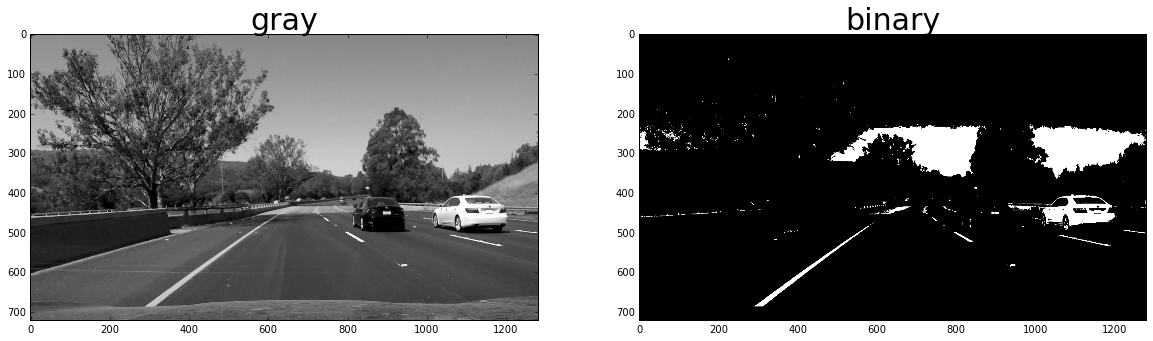

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
% matplotlib inline

image = mpimg.imread('images/test6.jpg')
thresh = (180, 255)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
binary = np.zeros_like(gray)
binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1

plot_two_images_adjacent(gray, binary, "gray", "binary")

#### Exploring the RGB colour space

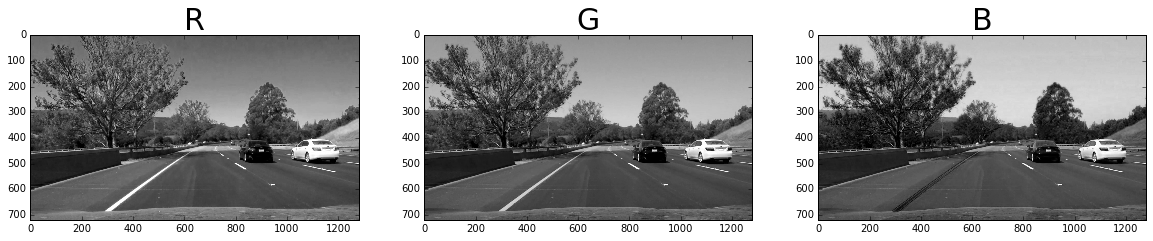

In [19]:
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]
plot_three_images_adjacent(R, G, B, img1_title="R", img2_title="G", img3_title="B")

The R channel does a reasonable job of highlighting the lines, and you can apply a similar threshold to find lane-line pixels:

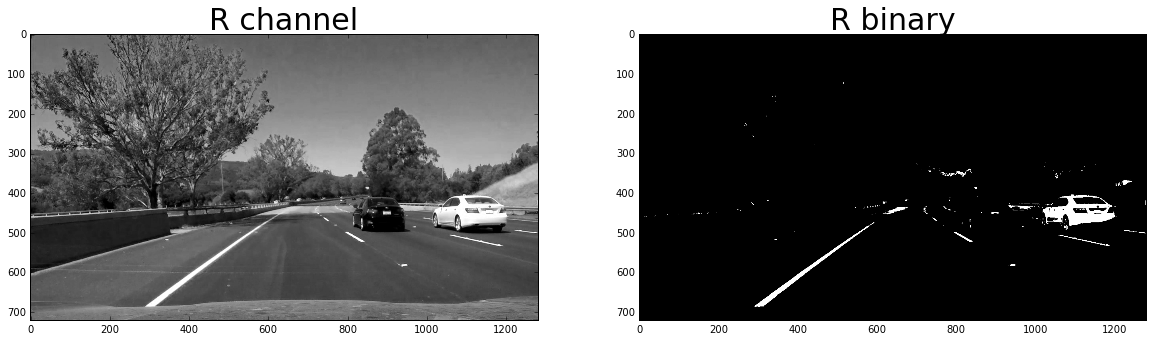

In [20]:
thresh = (200, 255)
binary = np.zeros_like(R)
binary[(R > thresh[0]) & (R <= thresh[1])] = 1

plot_two_images_adjacent(R, binary, "R channel", "R binary")

#### Exploring the HLS colour space

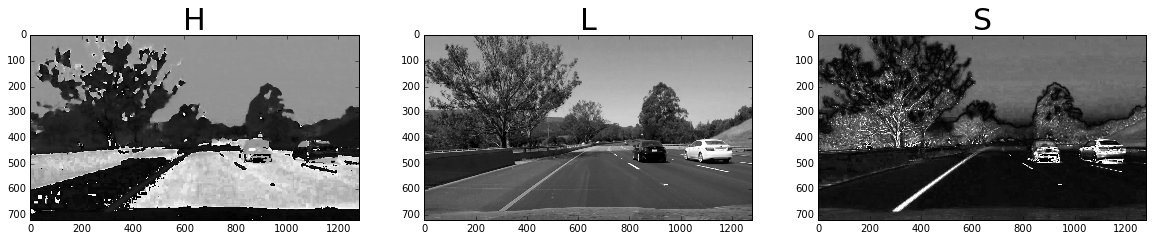

In [21]:
hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]

plot_three_images_adjacent(H, L, S, "H", "L", "S")

The S channel picks up the lines well, so let's try applying a threshold there:


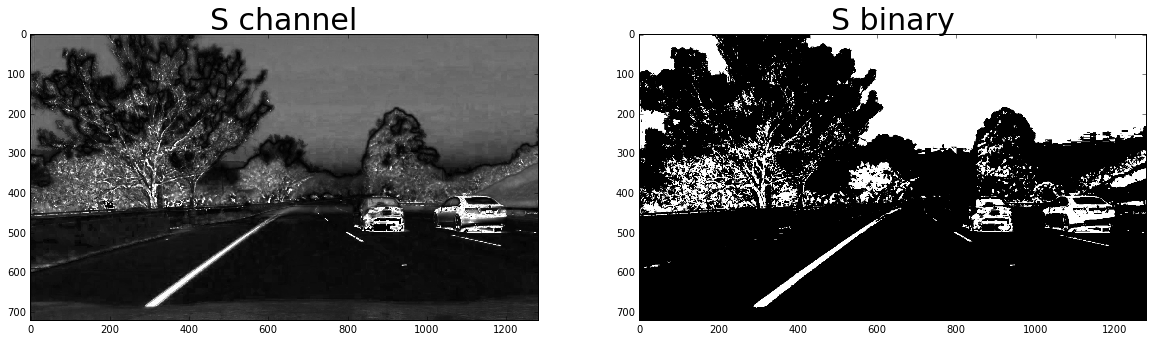

In [23]:
thresh = (90, 255)
binary = np.zeros_like(S)
binary[(S > thresh[0]) & (S <= thresh[1])] = 1

plot_two_images_adjacent(S, binary, "S channel", "S binary")

You can also see that in the H channel, the lane lines appear dark, so we could try a low threshold there and obtain the following result:



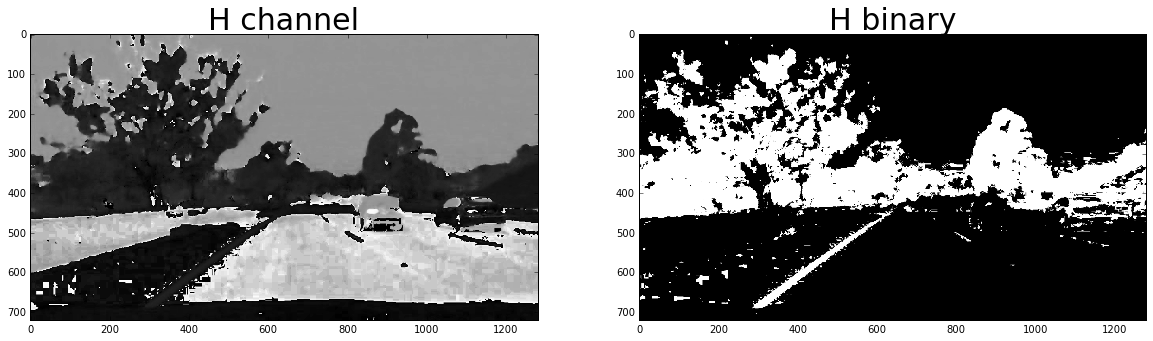

In [24]:
thresh = (15, 100)
binary = np.zeros_like(H)
binary[(H > thresh[0]) & (H <= thresh[1])] = 1

plot_two_images_adjacent(H, binary, "H channel", "H binary")

From these examples, you can see that the S channel is probably your best bet, given that it's cleaner than the H result and doing a bit better than the R channel or simple grayscaling. But, it's not abundantly clear that one method is far superior to the others.

In each case, I've tweaked the threshold parameters to do as good a job as possible of picking out the lines. Where we can really see a difference in results, however, is when we step to a new frame, where there are shadows and different colors in the pavement. Let's now look at the same thresholds applied to each of these four channels for this image:

Image used:
![](images/test4.jpg)


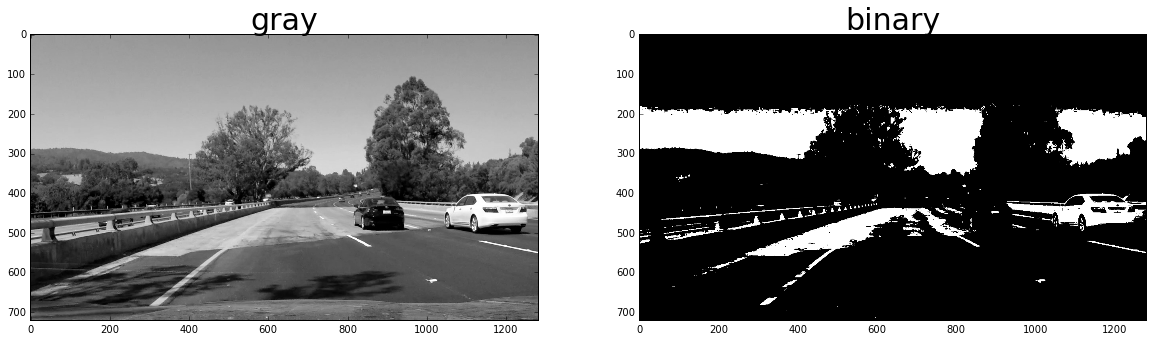

In [25]:
image = mpimg.imread('images/test4.jpg')
thresh = (180, 255)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
binary = np.zeros_like(gray)
binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1

plot_two_images_adjacent(gray, binary, "gray", "binary")

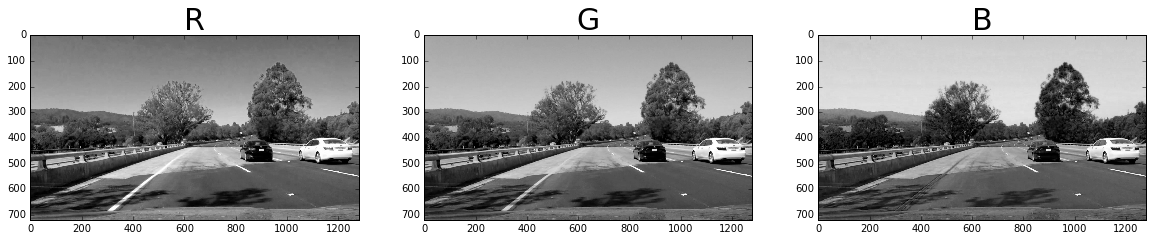

In [26]:
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]
plot_three_images_adjacent(R, G, B, img1_title="R", img2_title="G", img3_title="B")

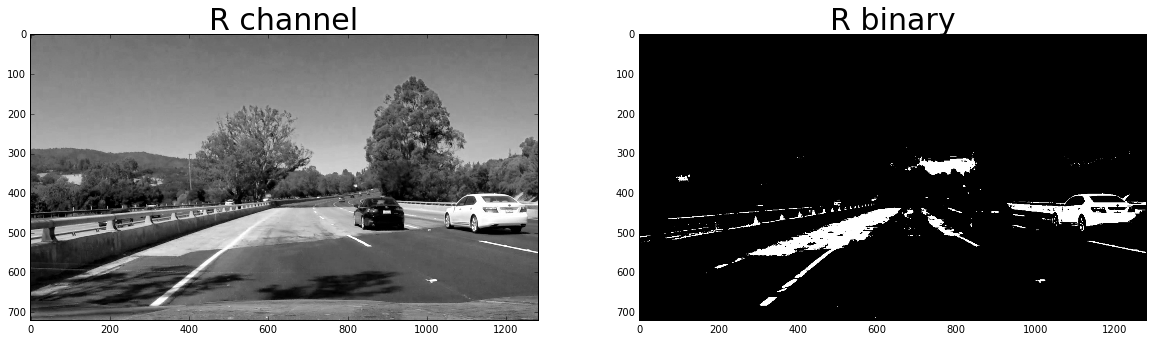

In [27]:
thresh = (200, 255)
binary = np.zeros_like(R)
binary[(R > thresh[0]) & (R <= thresh[1])] = 1

plot_two_images_adjacent(R, binary, "R channel", "R binary")

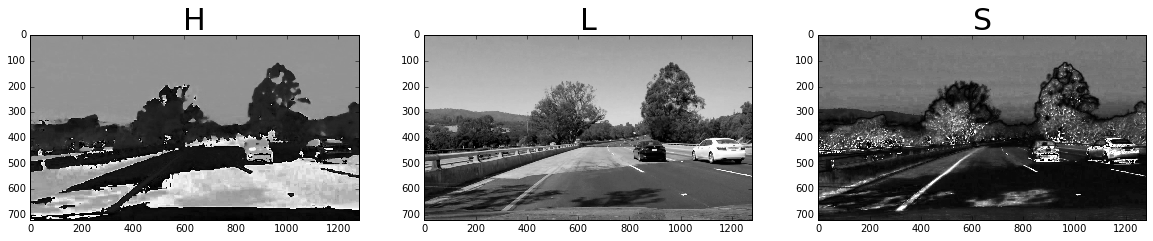

In [28]:
hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]

plot_three_images_adjacent(H, L, S, "H", "L", "S")

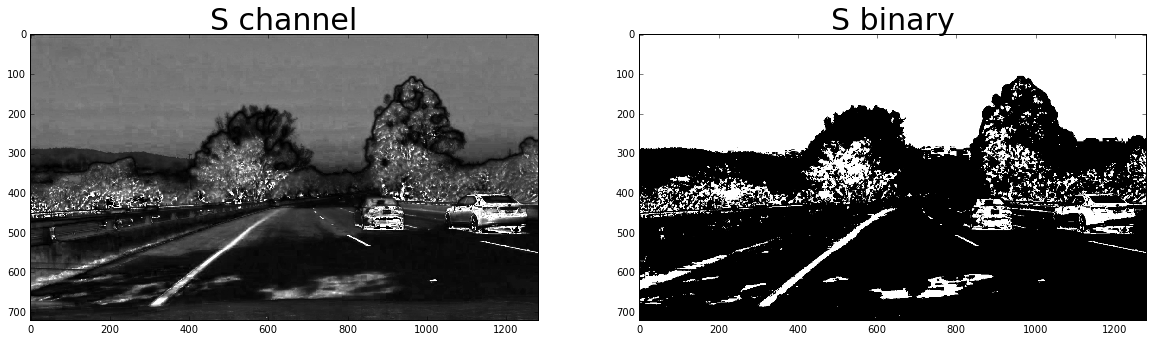

In [29]:
thresh = (90, 255)
binary = np.zeros_like(S)
binary[(S > thresh[0]) & (S <= thresh[1])] = 1

plot_two_images_adjacent(S, binary, "S channel", "S binary")

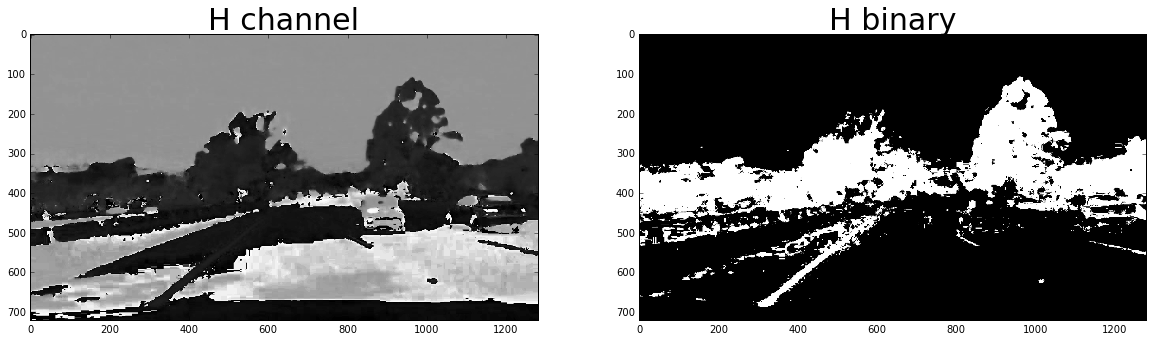

In [30]:
thresh = (15, 100)
binary = np.zeros_like(H)
binary[(H > thresh[0]) & (H <= thresh[1])] = 1

plot_two_images_adjacent(H, binary, "H channel", "H binary")

Now you can see that, **the S channel is still doing a fairly robust job of picking up the lines under very different color and contrast conditions, while the other selections look messy**. You could tweak the thresholds and get closer in the other channels, but the S channel is preferable because it is more robust to changing conditions.

It's worth noting, however, that **the R channel still does rather well on the white lines, perhaps even better than the S channel**. As with gradients, it's worth considering how you might combine various color thresholds to make the most robust identification of the lines.

#### HLS Quiz

Applying a colour threshold in HLS colour space. 

Write a function that takes in an image and threshold values and returns a binary output from applying the threshold to the S-channel. Apply your thresholds as you did for gradients but this time use an exclusive (>) lower bound and an inclusive upper bound (<=).

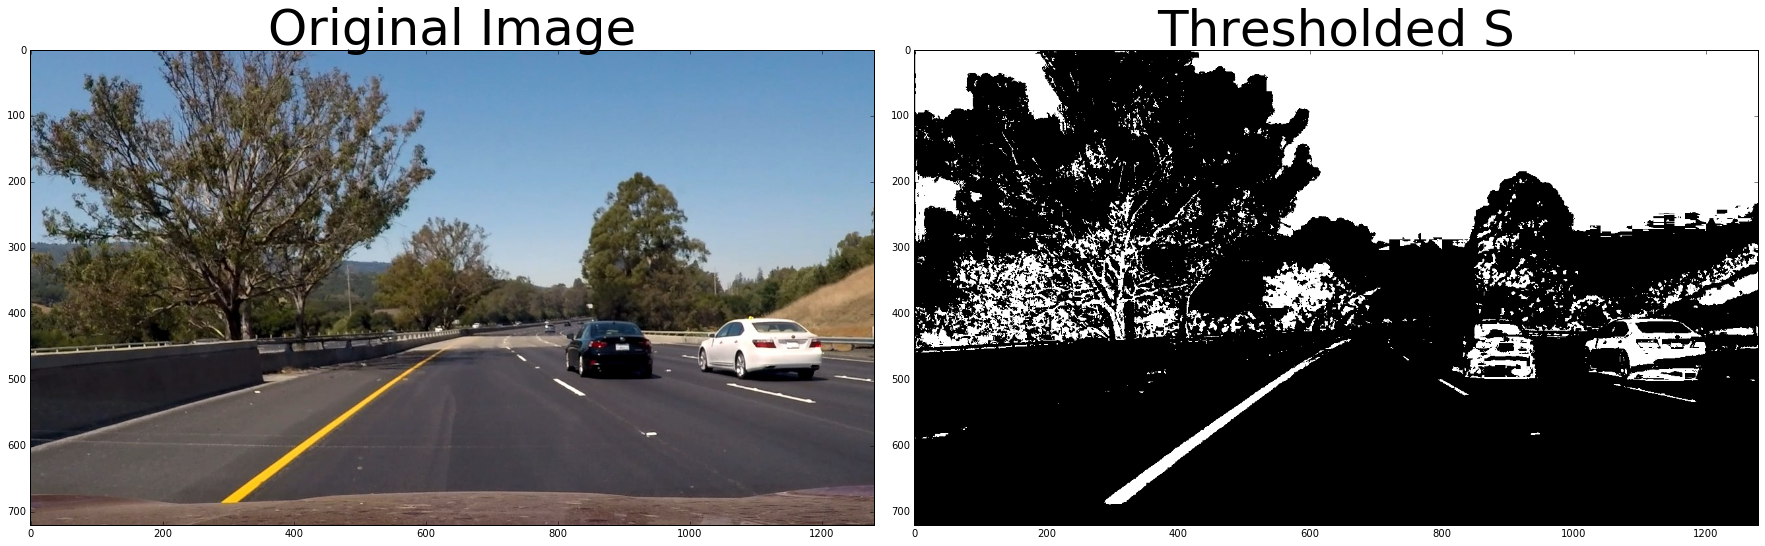

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in an image, you can also try test1.jpg or test4.jpg
image = mpimg.imread('images/test6.jpg') 

# Define a function that thresholds the S-channel of HLS
# Use exclusive lower bound (>) and inclusive upper (<=)
def hls_select(img, thresh=(0, 255)):
    # 1) Convert to HLS color space
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    
    # 2) Apply a threshold to the S channel
    S = hls[:,:,2]
    binary_output = np.zeros_like(S)
    binary_output[(S > thresh[0]) & (S <= thresh[1])] = 1
    
    # 3) Return a binary image of threshold result
    return binary_output
    
hls_binary = hls_select(image, thresh=(90, 255))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(hls_binary, cmap='gray')
ax2.set_title('Thresholded S', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### Colour and Gradient

Combine colour and gradient thresholding to get the best of both worlds.

![](images/18-36.png)

At this point, it's okay to detect edges around trees or cars because these lines can be mostly filtered out by applying a mask to the image and essentially cropping out the area outside of the lane lines. It's most important that you reliably detect different colors of lane lines under varying degrees of daylight and shadow.

You can clearly see which parts of the lane lines were detected by the gradient threshold and which parts were detected by the color threshold by stacking the channels and seeing the individual components. You can create a binary combination of these two images to map out where either the color or gradient thresholds were met.

In [ ]:
# Convert to HLS color space and separate the S channel
# Note: img is the undistorted image
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
s_channel = hls[:,:,2]

# Grayscale image
# NOTE: we already saw that standard grayscaling lost color information for the lane lines
# Explore gradients in other colors spaces / color channels to see what might work better
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Sobel x
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

# Threshold x gradient
thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

# Threshold color channel
s_thresh_min = 170
s_thresh_max = 255
s_binary = np.zeros_like(s_channel)
s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1

# Stack each channel to view their individual contributions in green and blue respectively
# This returns a stack of the two binary images, whose components you can see as different colors
color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))

# Combine the two binary thresholds
combined_binary = np.zeros_like(sxbinary)
combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1

# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Stacked thresholds')
ax1.imshow(color_binary)

ax2.set_title('Combined S channel and gradient thresholds')
ax2.imshow(combined_binary, cmap='gray')

Result:

The output is shown below. The final image color_binary is a combination of binary thresholding the S channel (HLS) and binary thresholding the result of applying the Sobel operator in the x direction on the original image.

![](images/18-37.png)

*(Left) Stacked image; the green is the gradient threshold component and the blue is the color channel threshold component. (Right) black and white combined thresholded image - this one has combined both gradient and color thresholds into one image.*

In this next exercise, you'll get the chance to play around with different combinations of color and gradient with the goal using the pipeline you come up with for your upcoming project. There's no correct submission, just explore!

Some interesting things to explore might include: the H channel, different threshold values for color and gradient binary images, and even a different color space, like HSV!

#### Quiz

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


image = mpimg.imread('bridge_shadow.jpg')

# Edit this function to create your own pipeline.
def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # Convert to HSV color space and separate the V channel
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    l_channel = hsv[:,:,1]
    s_channel = hsv[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channela
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))
    return color_binary
    
result = pipeline(image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result)
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

Unedited pipeline gives result:
![](images/18-38.png)

### Project Instructions

Image used in this section:
![](images/color-shadow-example.jpg)

In the project at the end of this module, the first thing you'll do is to compute the camera calibration matrix and distortion coefficients. You only need to compute these once, and then you'll apply them to undistort each new frame. Next, you'll apply thresholds to create a binary image and then apply a perspective transform.

#### Thresholding
You'll want to try out various combinations of color and gradient thresholds to generate a binary image where the lane lines are clearly visible. There's more than one way to achieve a good result, but for example, given the image above, the output you're going for should look something like this:

![](images/18-39.jpg)

#### Perspective Transform
Next, you want to identify four source points for your perspective transform. In this case, you can assume the road is a flat plane. This isn't strictly true, but it can serve as an approximation for this project. You would like to pick four points in a trapezoidal shape (similar to region masking) that would represent a rectangle when looking down on the road from above.

The easiest way to do this is to investigate an image where the lane lines are straight, and find four points lying along the lines that, after perspective transform, make the lines look straight and vertical from a bird's eye view perspective.

Here's an example of the result you are going for with straight lane lines:
![](images/18-40.jpg)

#### Now for curved lines
Those same four source points will now work to transform any image (again, under the assumption that the road is flat and the camera perspective hasn't changed). When applying the transform to new images, the test of whether or not you got the transform correct, is that the lane lines should appear parallel in the warped images, whether they are straight or curved.

Here's an example of applying a perspective transform to your thresholded binary image, using the same source and destination points as above, showing that the curved lines are (more or less) parallel in the transformed image:

![](images/18-41.jpg)

### Finding Lane Lines

